In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

# 1) 

In [26]:
def PowerEigDecomp(A,n):

    x = np.ones(A.shape[0])

    eig_val = []
    eig_vect = []
    for i in range(n):
        l = 1
        iter = 100
        for j in range(iter):
            x = A@x / np.linalg.norm(A@x)
            #print(x)
            l = (A@x)@x

        #print(l)
        #print(str(i)+" th dominant eigmap found")

        eig_val.append(np.round(l,decimals = 3))
        x1 = np.array([np.round(i,decimals = 3) for i in x])
        eig_vect.append(x1)

        ev = np.copy(x).reshape((A.shape[0],1))

        A = A - eig_val[i]*(ev @ ev.T)

        x = np.ones(A.shape[0])
    
    
    return eig_val,eig_vect

In [32]:
def SVD(A):
    U = np.zeros((A.shape[0],A.shape[0]))
    S = np.zeros((A.shape[0],A.shape[1]))
    V = np.zeros((A.shape[1],A.shape[1]))
    
    AAT = A@A.T
    ATA = A.T@A
    eigval_A,eigvect_A = PowerEigDecomp(AAT,A.shape[0])

    eigval_AT,eigvect_AT = PowerEigDecomp(ATA,A.shape[1])

    for i in range(min(A.shape)):
        S[i,i] = eigval_A[i]**0.5
    
    for i in range(len(eigval_A)):
        U[:,i] = eigvect_A[i]
    
    for i in range(len(eigval_AT)):
        V[i,:] = eigvect_AT[i]
    
    return U,S,V

In [36]:
def reconstruct(U,S,V,k):
    A_hat = U[:,:k] @ S[:k,:k] @ V.T[:k,]

    return A_hat

In [6]:
def FrobeniusNorm(A):
    
    ans = 0
    
    for x in A:
        for y in x:
            ans += y**2
    
    return ans ** 0.5

In [30]:
df = pd.read_csv("normalized_train.csv")

df.head()

,Unnamed: 0.1,Unnamed: 0,0,1,2,3,4,5,6,7,...,246,247,248,249,250,251,252,253,254,255
0,0,0,618,2,3,1,0,0,0,0,...,0,2,0,2,1,1,1,54,0,1
1,1,1,608,0,0,0,0,0,1,3,...,1,0,0,1,0,0,41,23,0,2
2,2,2,664,0,1,0,0,1,0,0,...,0,0,1,0,2,0,1,2,18,2
3,3,3,688,0,0,0,0,0,0,0,...,0,1,0,0,0,21,0,18,0,2
4,4,4,642,0,0,0,1,1,0,0,...,0,1,0,0,0,1,32,17,0,2


In [44]:
X = df.values[:1000,2:]
k = 256
U_X,S_X,V_X = SVD(X)


In [45]:
recon_err = []
for i in range(1,k+1):
    X_hat = reconstruct(U_X,S_X,V_X,i)
    print('recon with k = '+str(i)+' done')
    recon_err.append(FrobeniusNorm(X_hat-X))

recon with k = 1 done
recon with k = 2 done
recon with k = 3 done
recon with k = 4 done
recon with k = 5 done
recon with k = 6 done
recon with k = 7 done
recon with k = 8 done
recon with k = 9 done
recon with k = 10 done
recon with k = 11 done
recon with k = 12 done
recon with k = 13 done
recon with k = 14 done
recon with k = 15 done
recon with k = 16 done
recon with k = 17 done
recon with k = 18 done
recon with k = 19 done
recon with k = 20 done
recon with k = 21 done
recon with k = 22 done
recon with k = 23 done
recon with k = 24 done
recon with k = 25 done
recon with k = 26 done
recon with k = 27 done
recon with k = 28 done
recon with k = 29 done
recon with k = 30 done
recon with k = 31 done
recon with k = 32 done
recon with k = 33 done
recon with k = 34 done
recon with k = 35 done
recon with k = 36 done
recon with k = 37 done
recon with k = 38 done
recon with k = 39 done
recon with k = 40 done
recon with k = 41 done
recon with k = 42 done
recon with k = 43 done
recon with k = 44 do

Text(0.5, 1.0, 'reconstruction error vs k')

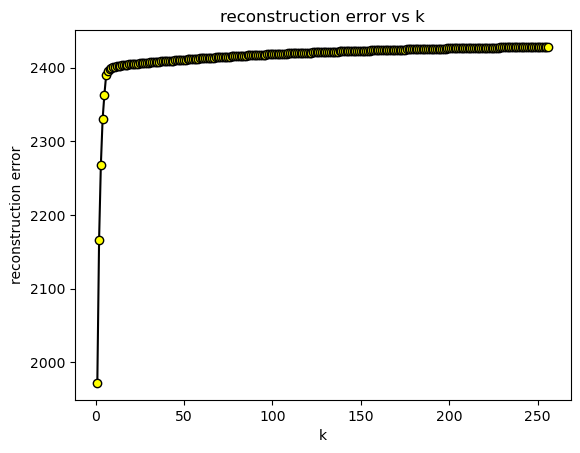

In [46]:
plt.plot([x for x in range(1,k+1)],recon_err
         ,marker = 'o'
         , markerfacecolor = 'yellow'
         , color = 'black')
plt.xlabel("k")
plt.ylabel("reconstruction error")
plt.title("reconstruction error vs k")

# 2)

In [ ]:
def eight_pt_algorithm(arr1,arr2):
    A = np.zeros((8,9))

    for i in range(len(arr1)):
        v = np.concatenate(arr1,np.ones(1)).reshape((3,1))
        v_dash = np.concatenate(arr2,np.ones(1)).reshape((1,3))
        
        A[i,:] = (v@v_dash).reshape(9)
    
    U,S,V = SVD(A.T@A)
    
    
    
